In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from imagingIO import loopMice, loadData, loadBeh, getBeh
from analysis import dffCalc, filtData, smoothData
from events import getEvents
from trials import markTrials
from bouts import getBouts, getBoutDur, markBouts
from statistics import stdCalc, getBoutMeans, getBoutMax, getStats
from plotter import plotMean, plotHeat, plotTrials

In [2]:
# Start gathering the data from FR1 exp
# Mice
mice = [(8404, 6), (8857, 3), (8864, 1)]
# Parameters
behType = 'FR1'
fs = 0.05
trials=[1,12]

In [3]:
# Get file paths
fileList = loopMice(mice, behType)

# Load the data
dataList = loadData(mice, behType)

# Load the behaviour
eventList = getBeh(mice, fileList['Behaviour'], behType)

# dFF and plot again
filtList = filtData(mice, dffCalc(mice, dataList, lowest=False), cutoff=5.0, order=6)
dFFList = smoothData(mice, filtList, window=4)

In [16]:
# Pick the event
eventType = 'Right_Poke'
base = -10.0
duration = 30.0

# Plot the mean of all
eventsData = markTrials(mice, dFFList, base=base, duration=duration, eventType=eventType, behType=behType, trials=trials, baselining=True)


3  mice were loaded.
Mouse number 8404  had  15  total rewards.
Mouse number 8857  had  17  total rewards.
Mouse number 8864  had  13  total rewards.


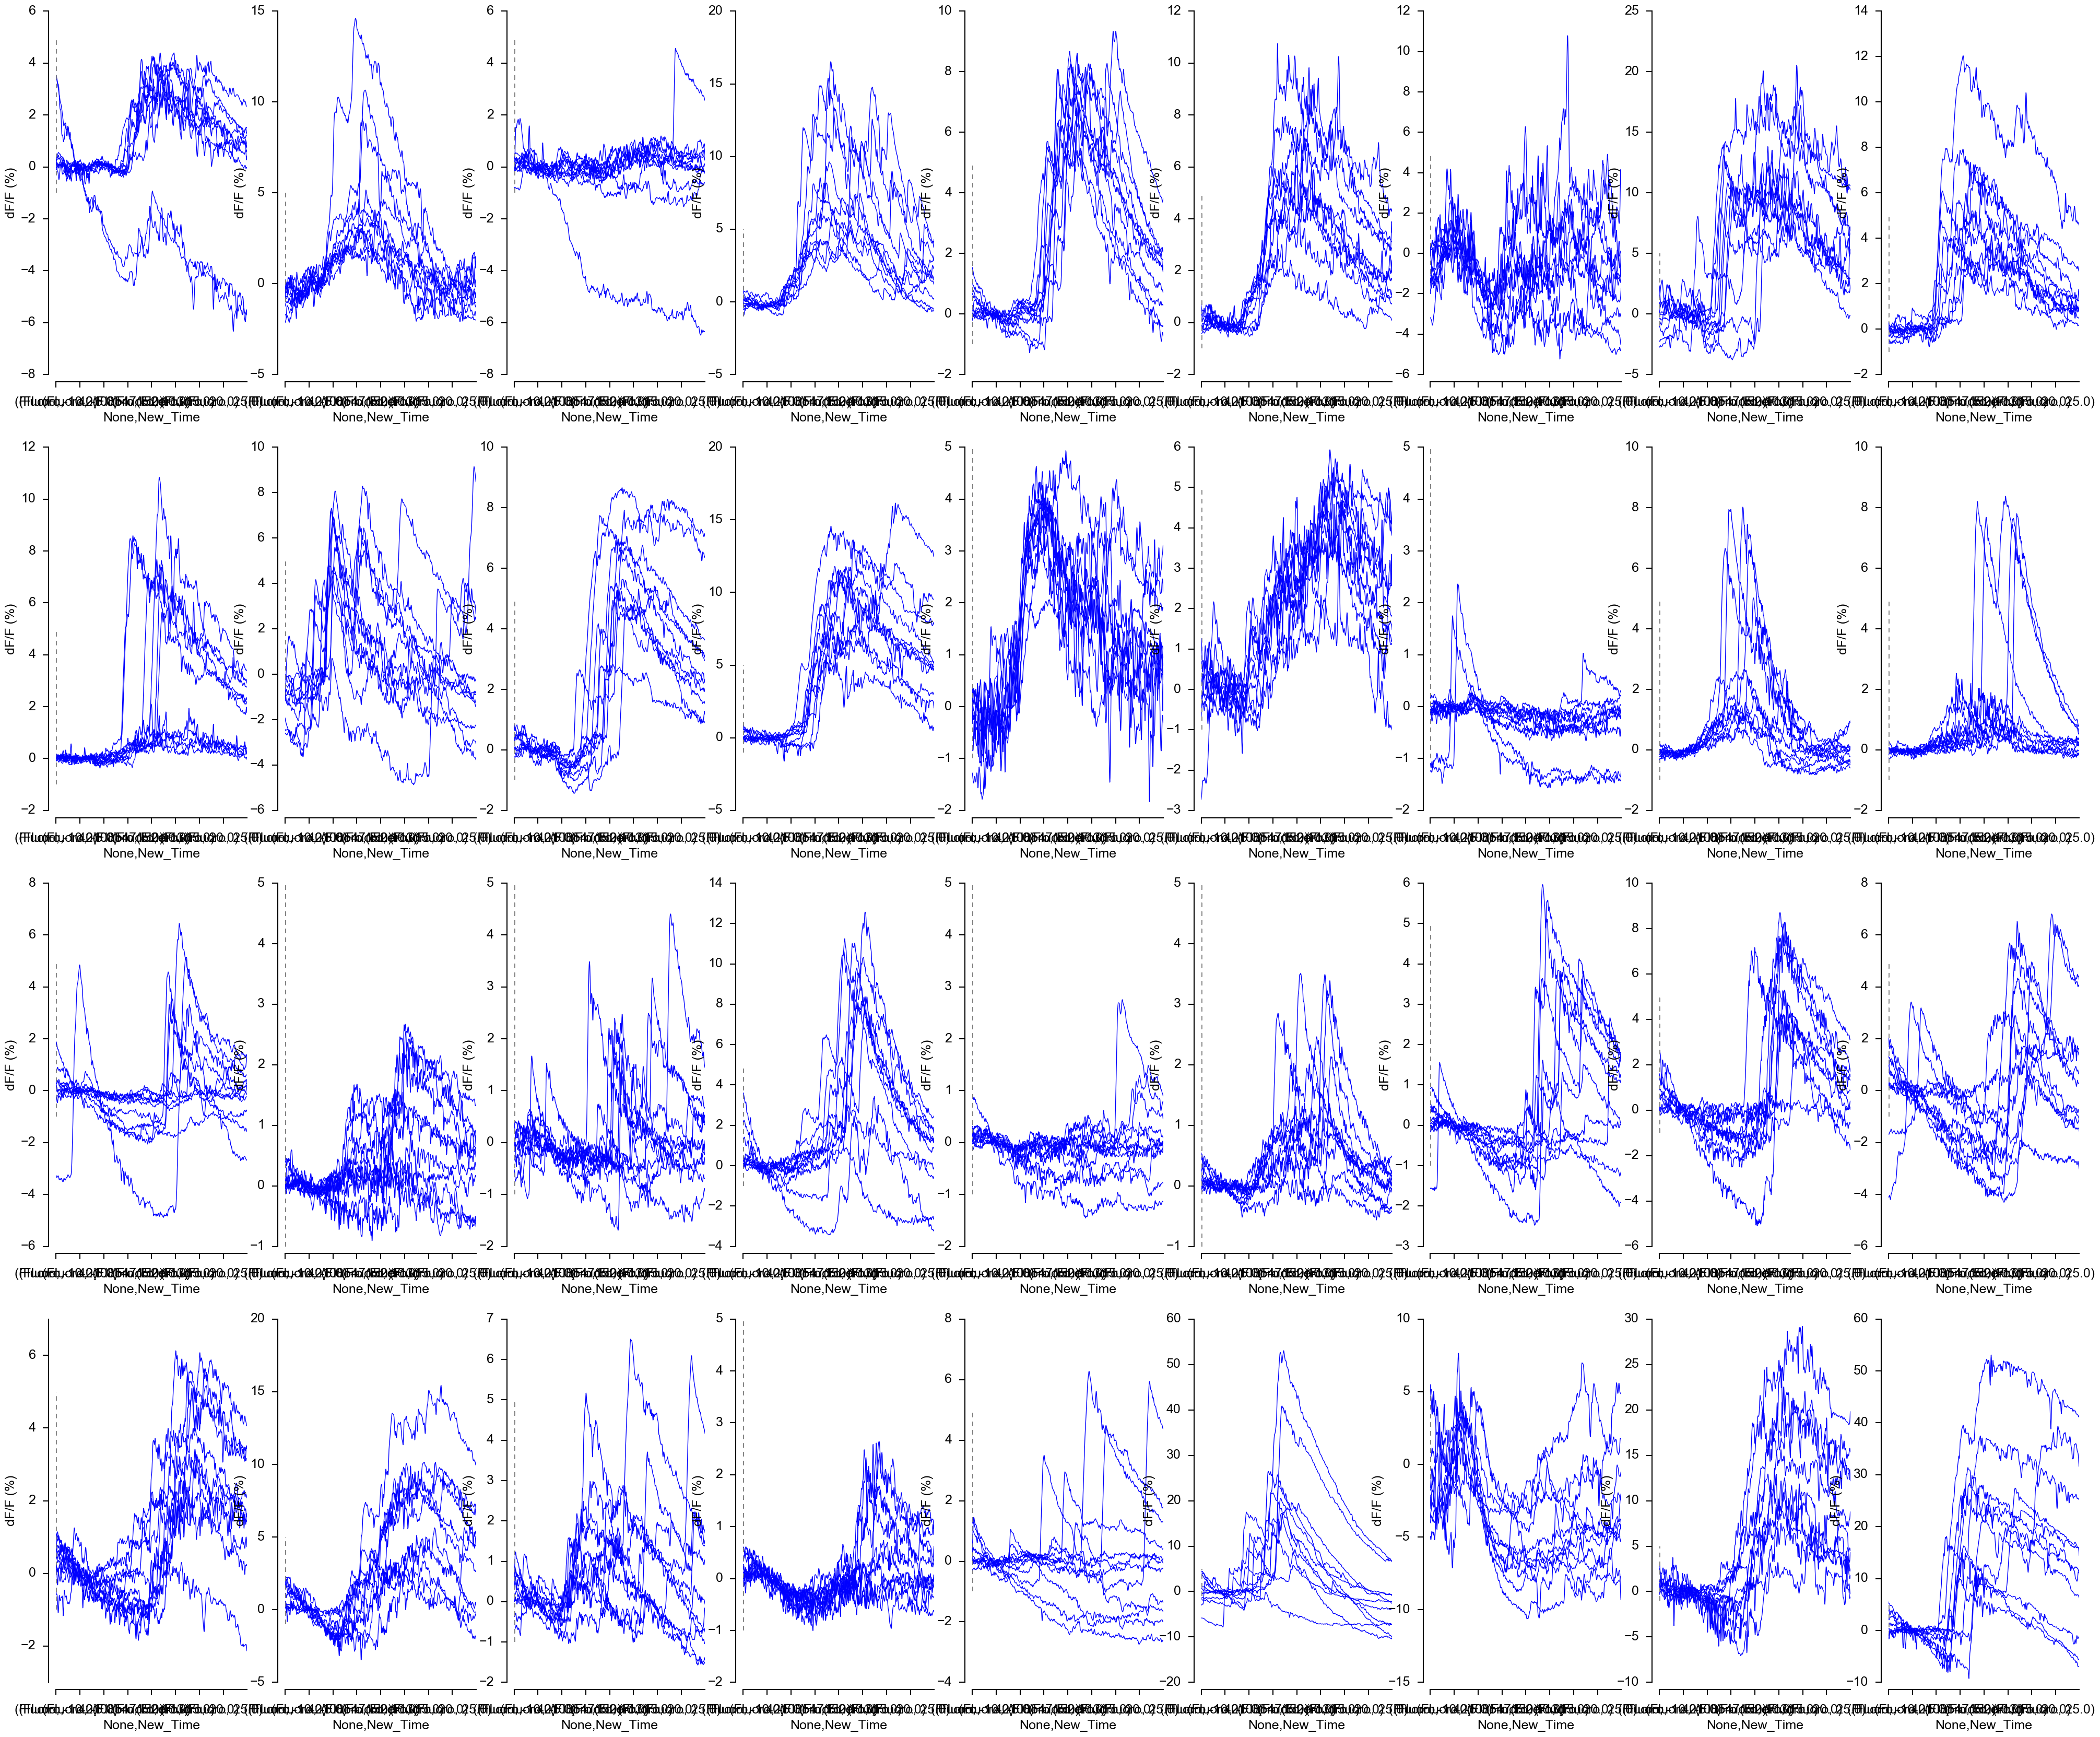

In [12]:
cellNames = eventsData['Cell'].drop_duplicates().values
row = 4
fig = plt.figure(figsize=(50,40), facecolor="w", dpi= 150)
time = np.arange(base,duration,fs)
for ind, cell in enumerate(cellNames):
    
    for i in range(1,12):
        plt.style.use('classic')
        # Set the font dictionaries (for plot title and axis titles)
        font = {'sans-serif' : 'Arial',
                'weight' : 'normal',
                'size'   : 18}
        plt.rc('font', **font)
        
        line = 1.5
        colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')
    
        ax = plt.subplot(row, len(cellNames)/row, ind+1)
        
        ## labels
        ax.set_xlabel("Time (sec)")
        ax.set_ylabel("dF/F (%)")
        #ax.set_title("Aligned to event::Update the title", fontsize= 12)

        ## Remove top axes and right axes ticks
        ax.get_xaxis().tick_top()
        ax.get_yaxis().tick_left()
        
        ## Remove top axes and right axes ticks
        ax.get_xaxis().tick_top()
        ax.get_yaxis().tick_left()

        ## adjust the spines and ticks
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_linewidth(line)
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['bottom'].set_linewidth(line)
        ax.spines['bottom'].set_position(('outward', 10))
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        ## decorate the axes
        ax.tick_params(axis='y', color= '#000000', width= line, direction='out', length= 8, which='major', pad=10)
        ax.tick_params(axis='x', color= '#000000', width= line, direction='out', length= 8, which='major', pad=12)
        
        ax.plot([0, 0],[-1, 5], 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7)
        
        df=eventsData.pivot_table(index=['Cell','Event'], columns='New_Time')
        df.loc[cell,i].plot(legend=False, subplots=True)
        
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\5_eat_start_all_cells_plots_10sec.svg")
        

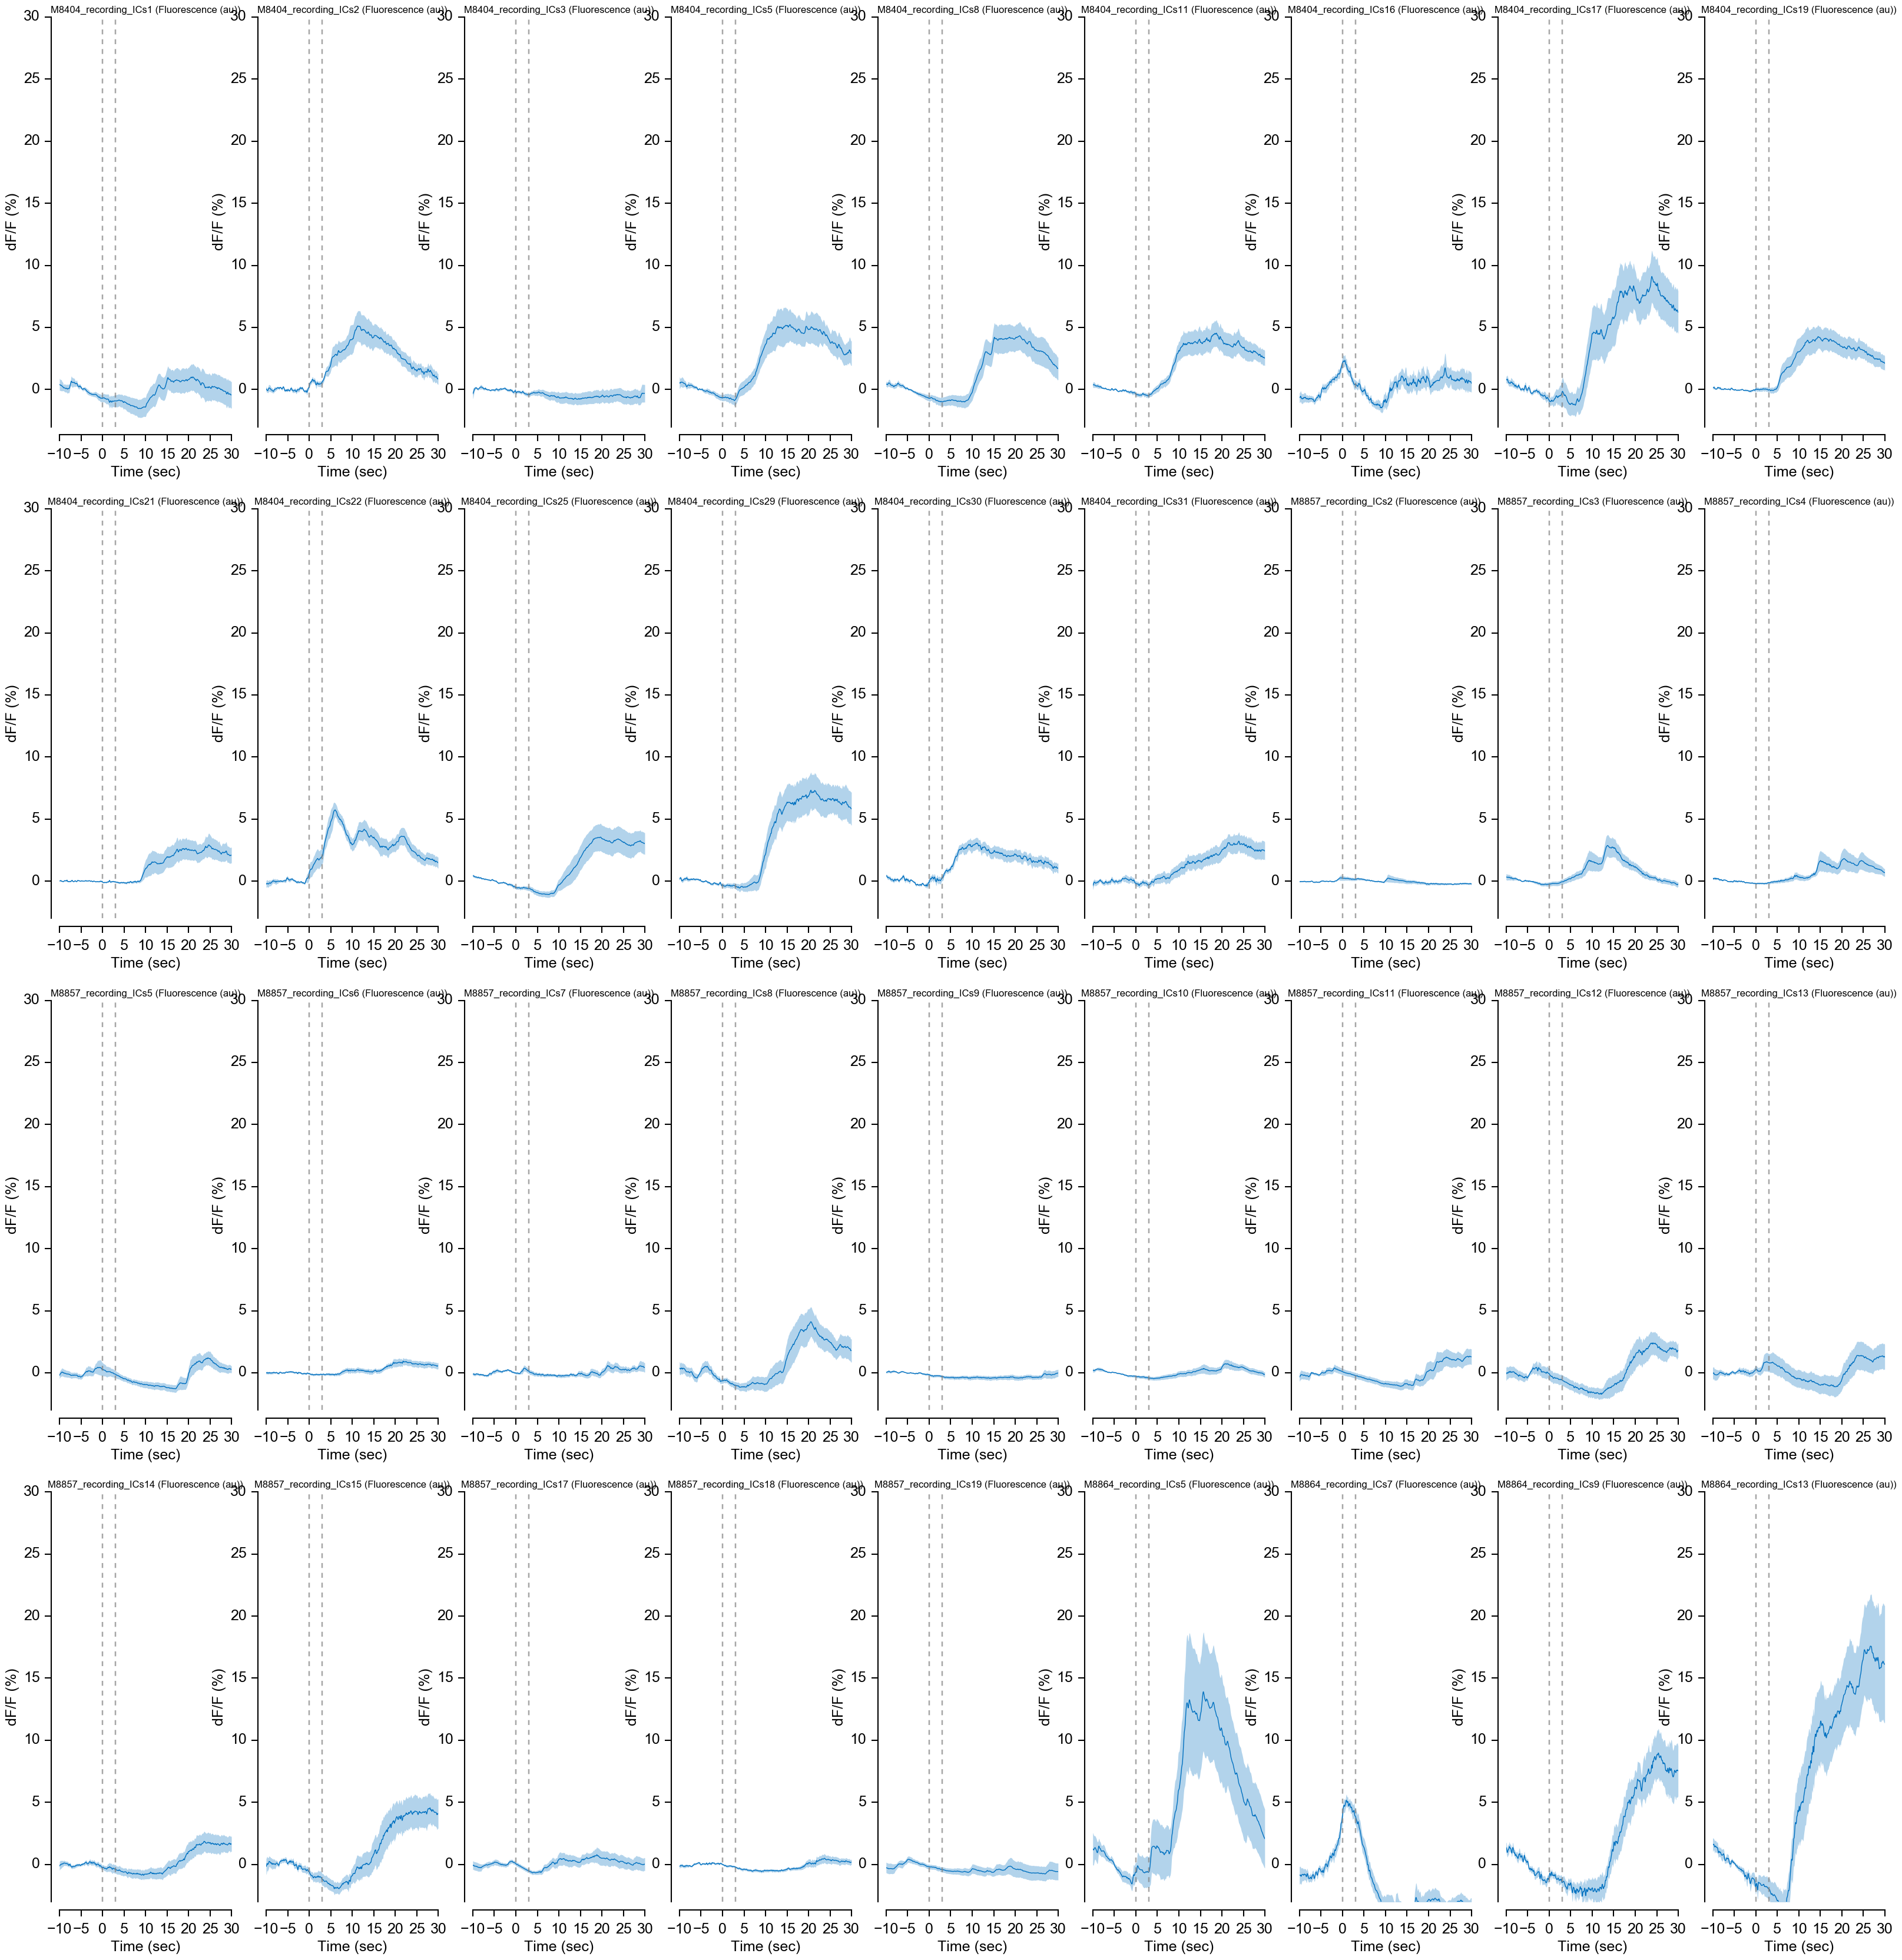

In [18]:
cellNames = eventsData['Cell'].drop_duplicates().values
time = np.arange(base,duration,fs)

# Start running the analysis
#boutMeansFR1 = getBoutMeans(mice, eventType=['Eat_Start', 'Eat_End'], behType=behType, trials=trials, dff=True, baseline=False, base=base)

row = 4
fig = plt.figure(figsize=(40,40), facecolor="w", dpi= 150)
for ind, cell in enumerate(cellNames):
    df=eventsData.pivot_table(index=['Cell','Event'], columns='New_Time')
    semCell = df.loc[cell].sem(axis=0)
    meanCell = df.loc[cell].mean(axis=0)
    
    plt.style.use('classic')
    # Set the font dictionaries (for plot title and axis titles)
    font = {'sans-serif' : 'Arial',
            'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)

    line = 1.5
    colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')
    
    ax = plt.subplot(row, len(cellNames)/row, ind+1)
    
    ## labels
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("dF/F (%)")
    #title = "Cell: " + cell + "\n" + "Class: " + statsFR1['Class'].loc[cell]
    ax.set_title(cell, fontsize= 12)

    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_top()
    ax.get_yaxis().tick_left()

    ## adjust the spines and ticks
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_linewidth(line)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_linewidth(line)
    ax.spines['bottom'].set_position(('outward', 10))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ## decorate the axes
    ax.tick_params(axis='y', color= '#000000', width= line, direction='out', length= 8, which='major', pad=10)
    ax.tick_params(axis='x', color= '#000000', width= line, direction='out', length= 8, which='major', pad=12)

    ax.fill_between(time, meanCell+semCell, meanCell-semCell, facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
    cat, = ax.plot(time, meanCell, colors[1], label=eventType)    
    
    # limits
    lims = [-3, 30]
    ax.set_ylim(lims)
    
    ax.plot([0, 0],lims, 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7)
    ax.plot([3.0, 3.0],lims, 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7)

fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\5_eat_start_all_cells_means_10sec.svg")